# DEM map, watershed Boundary, river mapping figures

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import rioxarray
import contextily as ctx

### DEM Map

In [2]:
# Read elevation raster
# ----------------------------
from pysheds.grid import Grid

grid = Grid.from_raster('/home/etboud/projects/data/DEMtif/Copernicus_DSM_10_N38_00_W120_00_DEM.tif')
dem = grid.read_raster('/home/etboud/projects/data/DEMtif/Copernicus_DSM_10_N38_00_W120_00_DEM.tif')

/home/etboud/mambaforge/envs/planet_env/lib/python3.11/site-packages/pysheds/io.py:134: UserWarning: No `nodata` value detected. Defaulting to 0.
  warnings.warn('No `nodata` value detected. Defaulting to 0.')
/home/etboud/mambaforge/envs/planet_env/lib/python3.11/site-packages/pysheds/io.py:134: UserWarning: No `nodata` value detected. Defaulting to 0.
  warnings.warn('No `nodata` value detected. Defaulting to 0.')


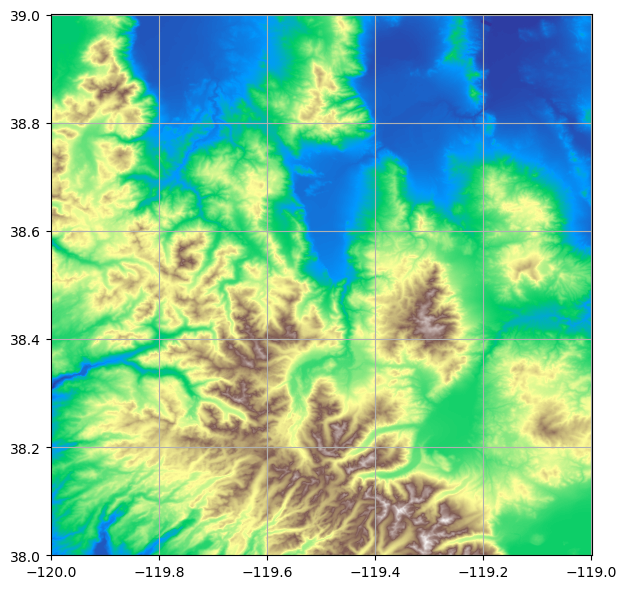

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(dem, extent=grid.extent, cmap='terrain', zorder=1)
plt.grid(zorder=0)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [4]:
# read in watershed and sub-basin boundary shapefiles
shp = gpd.read_file('/home/etboud/projects/data/shp_out/tuolumne.shp')
Q01_shp = gpd.read_file('/home/etboud/projects/data/shp_out/Q01.shp')
Q02_shp = gpd.read_file('/home/etboud/projects/data/shp_out/Q02.shp')
Q03_shp = gpd.read_file('/home/etboud/projects/data/shp_out/Q03.shp')
Q04_shp = gpd.read_file('/home/etboud/projects/data/shp_out/Q04.shp')
Q05_shp = gpd.read_file('/home/etboud/projects/data/shp_out/Q05.shp')
Q06_shp = gpd.read_file('/home/etboud/projects/data/shp_out/Q06.shp')
rivers = gpd.read_file('/home/etboud/projects/data/shp_out/tuo_rivers.shp')

In [9]:
#read in ASO flight for option to overlay on map
sd_3m = "/home/etboud/projects/data/ASO_3M_SD_USCATB_20130525.tif"
rio_3m = rioxarray.open_rasterio(sd_3m,mask_and_scale=True)
rio_3m=rio_3m.where(rio_3m>0)
rio_30m_4269 = rio_3m.coarsen(x=10,y=10,boundary='pad').median().rio.reproject("EPSG:4269")

### Watershed and sub basin map

Text(0.5, 1.0, 'Catchment polygon')

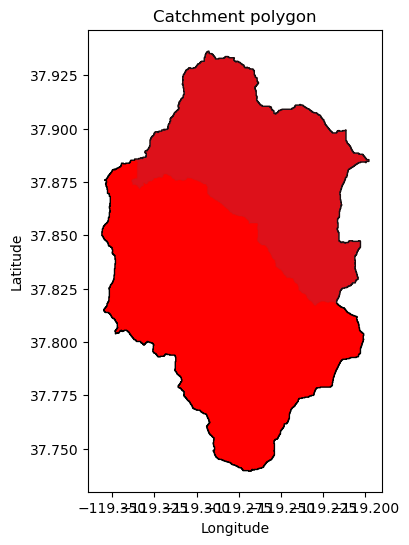

In [27]:
fig, ax = plt.subplots(figsize=(6,6))
#rio_30m_4269.plot(ax=ax,cmap='Blues',vmin=0,vmax=1.5)
#shp.plot(ax=ax,edgecolor='red',facecolor='red',alpha=.15)
#Q06_shp.plot(ax=ax,facecolor='yellow')
Q04_shp.plot(ax=ax,facecolor='red', edgecolor='black')
#Q02_shp.plot(ax=ax,facecolor = 'green')
#Q01_shp.plot(ax=ax, facecolor = 'magenta')
Q03_shp.plot(ax=ax,edgecolor='brown',alpha=.15)
#Q05_shp.plot(ax=ax,facecolor='purple')
#rivers.plot(ax=ax, color='navy')
#rio_30m_4269.plot(ax=ax,cmap='Blues',vmin=0,vmax=1.5)
#ctx.add_basemap(ax=ax,crs=dat_array_30m_4326.rio.crs,source=ctx.providers.Esri.WorldImagery,attribution='')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Catchment polygon')

### Contextily backgorund map and boundary outlines only

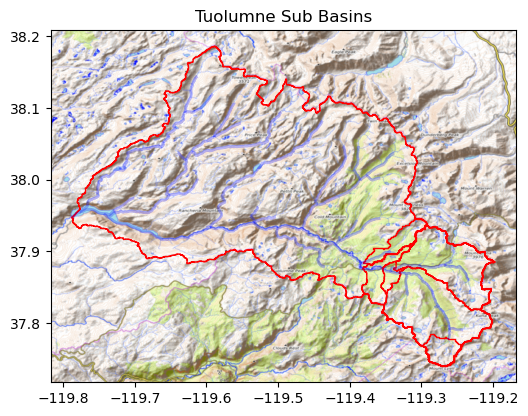

In [26]:
fig, ax = plt.subplots(figsize=(6,6))
# Plotting with red outline
shp.plot(ax=ax, edgecolor='red', facecolor='none')
Q06_shp.plot(ax=ax, edgecolor='red', facecolor='none')
Q04_shp.plot(ax=ax, edgecolor='red', facecolor='none')
Q02_shp.plot(ax=ax, edgecolor='red', facecolor='none')
Q01_shp.plot(ax=ax, edgecolor='red', facecolor='none')
Q03_shp.plot(ax=ax, edgecolor='red', facecolor='none')
Q05_shp.plot(ax=ax, edgecolor='red', facecolor='none')
rivers.plot(ax=ax, edgecolor='blue', facecolor='none', alpha=.25, linewidth=2)

# You can add the basemap if needed, uncomment if necessary
ctx.add_basemap(ax=ax, crs="EPSG:4326", source=ctx.providers.OpenTopoMap, attribution='')

plt.xlabel('')
plt.ylabel('')
plt.title('Tuolumne Sub Basins')

plt.show()

In [28]:
clip_attempt = gpd.clip(Q03_shp, Q04_shp)

In [6]:
clip_03 = Q03_shp.clip(Q04_shp)

In [2]:
import glob
import geopandas as gpd
from shapely.geometry import Polygon

dir = '/home/etboud/projects/data/shp_out/'
fn_list = glob.glob(dir + "*.shp")

for fn in fn_list:
    # Extract file ID
    ID = fn.split("/")[-1].split(".")[0]

    # Read GeoDataFrame from file
    ID_gdf = gpd.read_file(fn)

    # Correct polygons to be in union
    union_geometry = ID_gdf.geometry.unary_union

    # Create GeoSeries from union to convert back to GeoDataFrame
    union_series = gpd.GeoSeries([union_geometry])

    # Create GeoDataFrame for the union
    union_gdf = gpd.GeoDataFrame(geometry=union_series, crs=ID_gdf.crs)
    locals()[f"{ID}_union_gdf"]=union_gdf
    # Now you can work with union_gdf as needed
    #print(f"Processed {ID}:")
    #print(union_gdf.head())

In [31]:
diff_Q04 = gpd.overlay(Q04_union_gdf, Q03_union_gdf, how='difference')
diff_2_Q04 = gpd.overlay(diff_Q04,Q02_union_gdf,how='difference')


<Axes: >

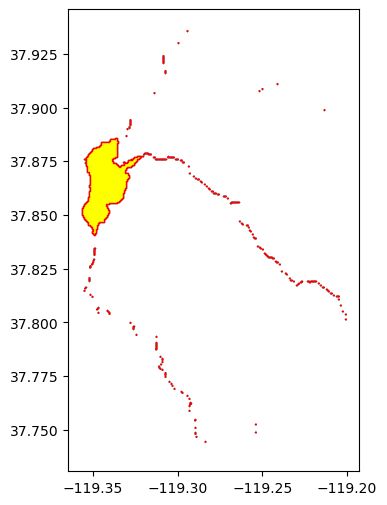

In [51]:
fig, ax = plt.subplots(figsize=(6,6))
diff_2_Q04.plot(ax=ax,facecolor='yellow',edgecolor='black')
#diff_Q04.plot(ax=ax,edgecolor='red',facecolor='red',alpha=.15)
cleaned_gdf.plot(ax=ax,facecolor='yellow',edgecolor='red')

In [48]:
from shapely.ops import unary_union  # Import unary_union explicitly

# Assuming diff_2_Q04 is your GeoDataFrame

# Buffer the points and check for intersection with other points
buffered = diff_2_Q04.geometry.buffer(distance=.9)  # Adjust buffer distance as needed
isolated_points = diff_2_Q04[~diff_2_Q04.geometry.intersects(unary_union(buffered))]

# Remove isolated points
cleaned_gdf = diff_2_Q04.drop(isolated_points.index)

# Display the cleaned GeoDataFrame
print(cleaned_gdf)

/tmp/ipykernel_1629597/2890113758.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered = diff_2_Q04.geometry.buffer(distance=.9)  # Adjust buffer distance as needed


                                            geometry
0  MULTIPOLYGON (((-119.25208 37.90819, -119.2520...


In [40]:
# Buffer the points and check for intersection with other points
buffered = diff_2_Q04.geometry.buffer(1)  # Adjust buffer distance as needed
isolated_points = diff_2_Q04[~diff_2_Q04.geometry.intersects(unary_union(buffered))]

# Remove isolated points
cleaned_gdf = diff_2_Q04.drop(isolated_points.index)


/tmp/ipykernel_1629597/3036811831.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered = diff_2_Q04.geometry.buffer(1)  # Adjust buffer distance as needed


NameError: name 'unary_union' is not defined

<Axes: >

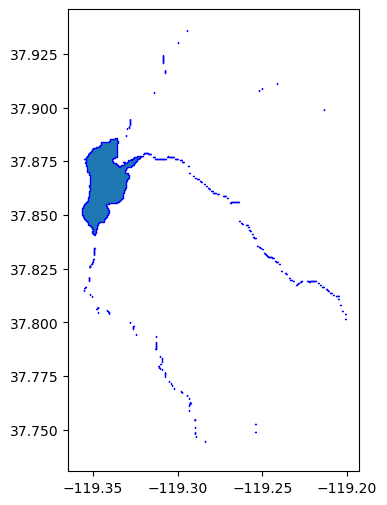

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
#diff_buff.plot(ax=ax,edgecolor = 'navy')
diff_shape.plot(ax=ax,edgecolor='blue')

Text(0.5, 1.0, 'Catchment polygon')

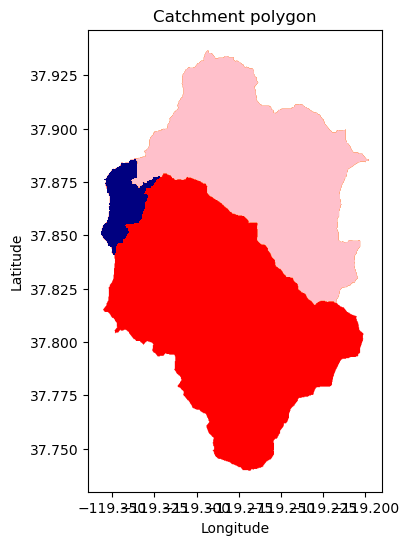

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
#rio_30m_4269.plot(ax=ax,cmap='Blues',vmin=0,vmax=1.5)
#shp.plot(ax=ax,edgecolor='red',facecolor='red',alpha=.15)
#Q06_shp.plot(ax=ax,facecolor='yellow')
Q04_shp.plot(ax=ax,facecolor='red')

#Q01_shp.plot(ax=ax, facecolor = 'magenta')
Q03_shp.plot(ax=ax,facecolor='orange')
clip_03.plot(ax=ax,facecolor='pink')
#Q05_shp.plot(ax=ax,facecolor='purple')
#rivers.plot(ax=ax, color='navy')
#rio_30m_4269.plot(ax=ax,cmap='Blues',vmin=0,vmax=1.5)
diff_shape.plot(ax=ax,facecolor = 'navy')
#clip_attempt.plot(ax=ax, color = 'brown')
#Q02_shp.plot(ax=ax,facecolor = 'green')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Catchment polygon')


In [4]:
diff_shape = gpd.overlay(Q04_shp, Q03_shp, how='difference')
diff_shape = gpd.overlay(diff_shape, Q02_shp, how='difference')

In [4]:
myshpfile = gpd.read_file('/home/etboud/projects/data/shp_out/tuo_rectangle.shp')
myshpfile.to_file('tuo_rectangle.geojson', driver='GeoJSON')

notes: clipQ06 by Q04, Q04 by Q03, Q02 by Q01